In [7]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ragha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import os
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [9]:
# Reading a CSV file with pandas
mbti_df = pd.read_csv('E:/SEM_2/ML/ML_Project/MBTI_Phase_3/mbti_1.csv')

#DATA PREPROCESSING
# Converting text in 'posts' column to lowercase
mbti_df["posts"] = mbti_df["posts"].str.lower()

# Removing URL links from posts
mbti_df["posts"] = mbti_df["posts"].str.replace(r'https?://[a-zA-Z0-9./-]/[a-zA-Z0-9?=_.][_0-9.a-zA-Z/-]*', ' ')

# Removing numbers, non-alphanumeric characters, and extra whitespaces from posts
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'[0-9\W_+]', ' ', x))

# Removing multiple whitespaces from posts
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: re.sub(r'\s+', ' ', x))

# Removing stopwords from posts
stop_words = set(stopwords.words("english"))
mbti_df["posts"] = mbti_df["posts"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

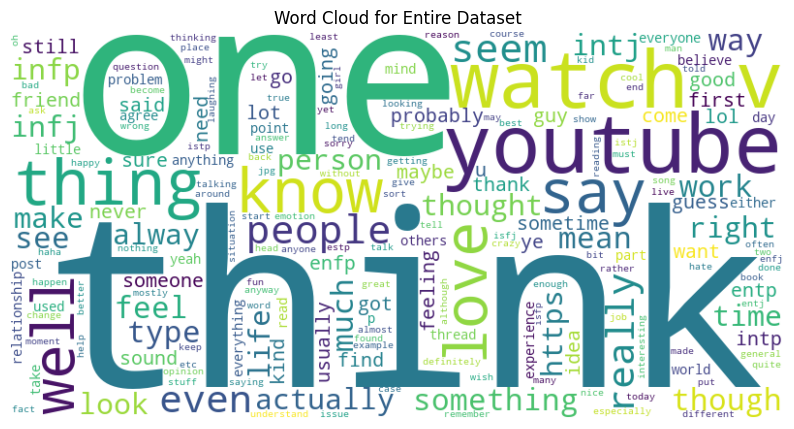

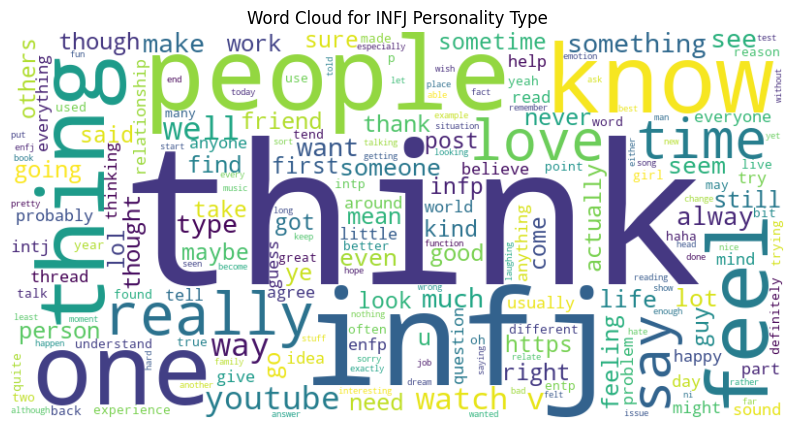

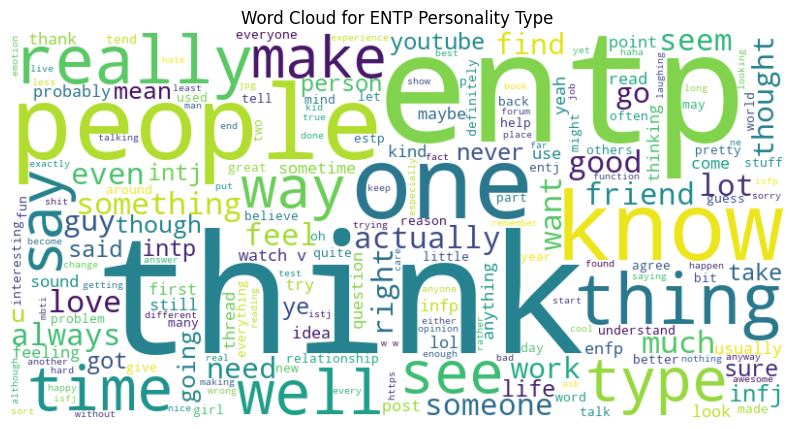

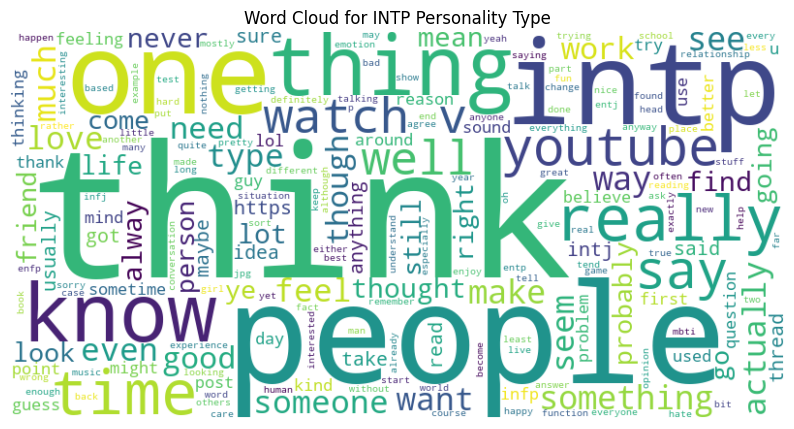

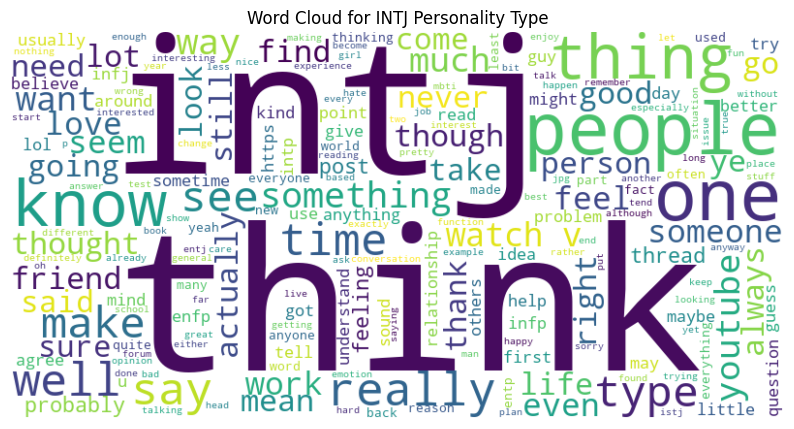

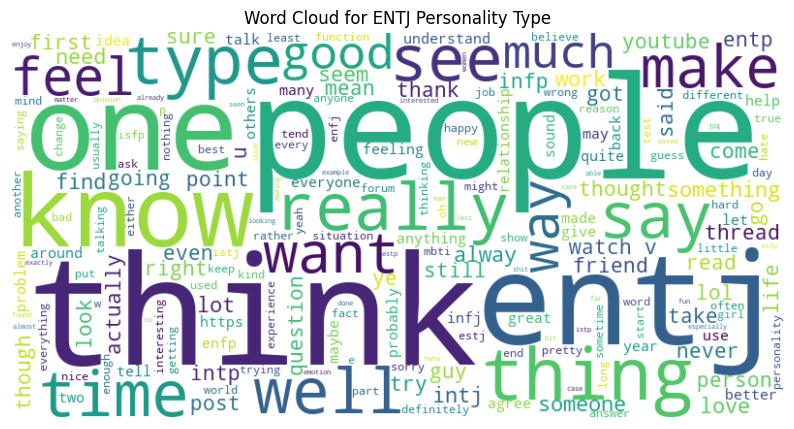

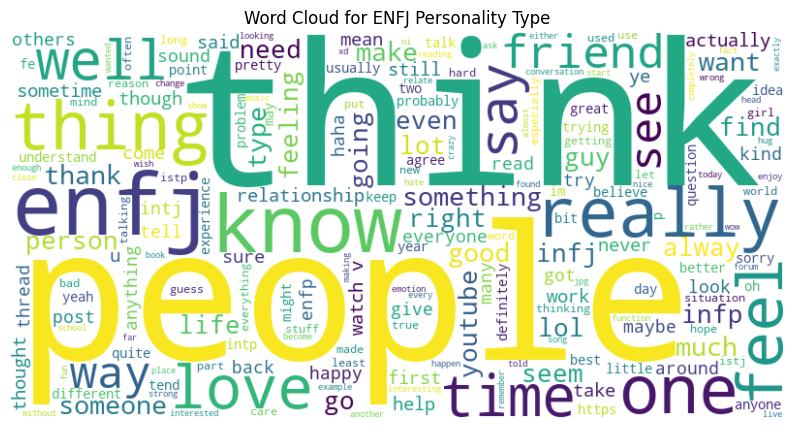

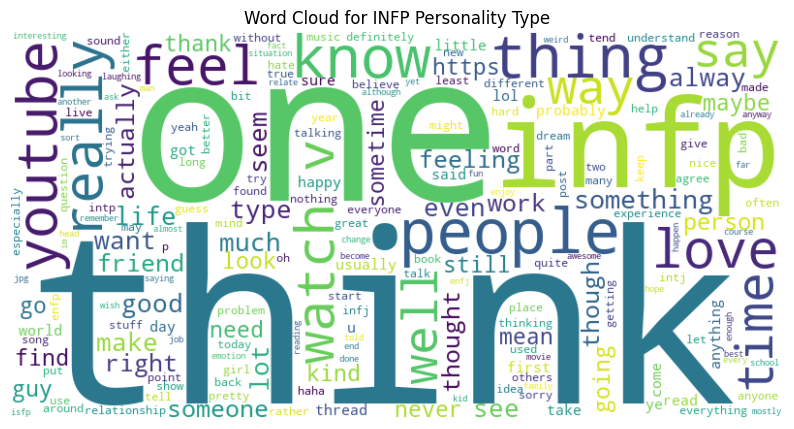

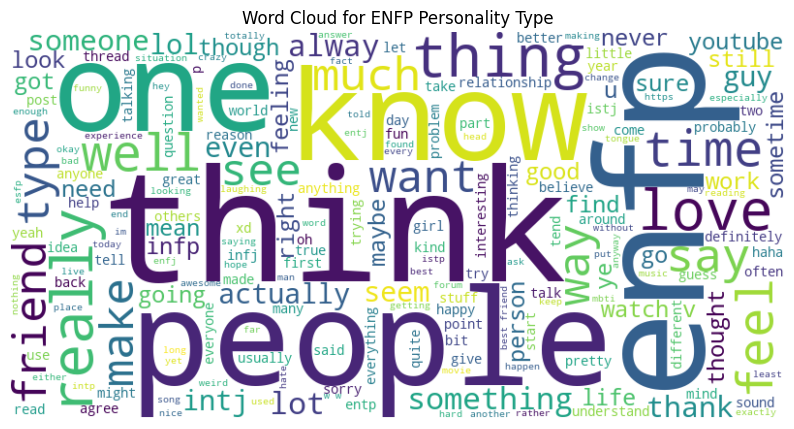

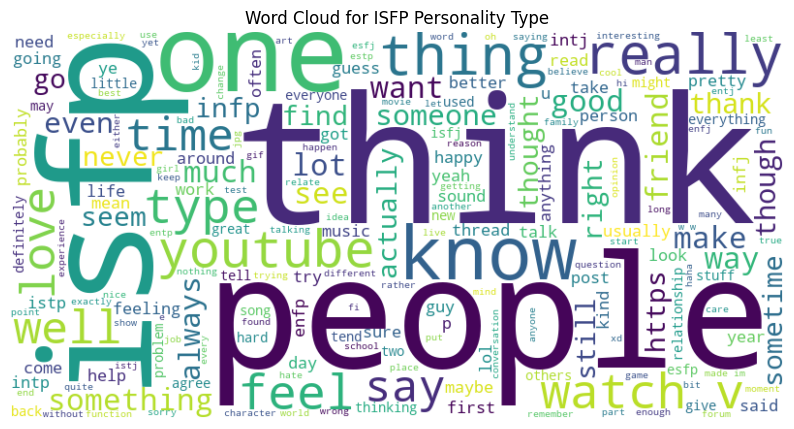

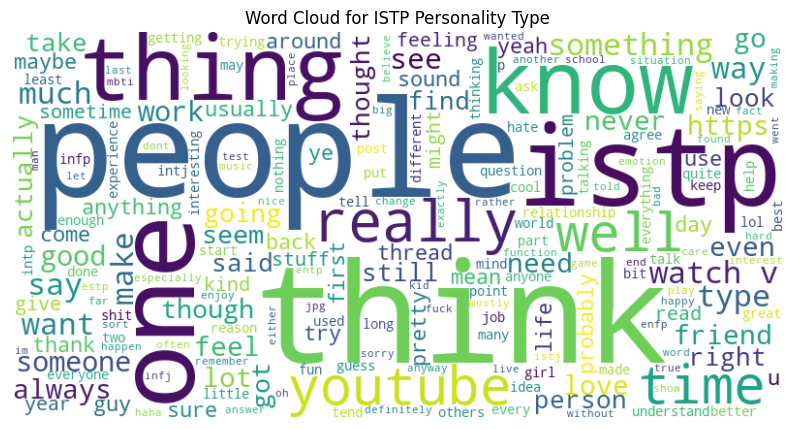

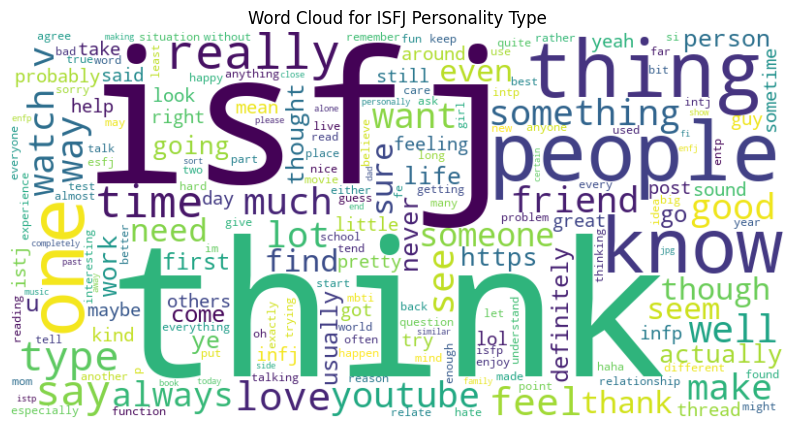

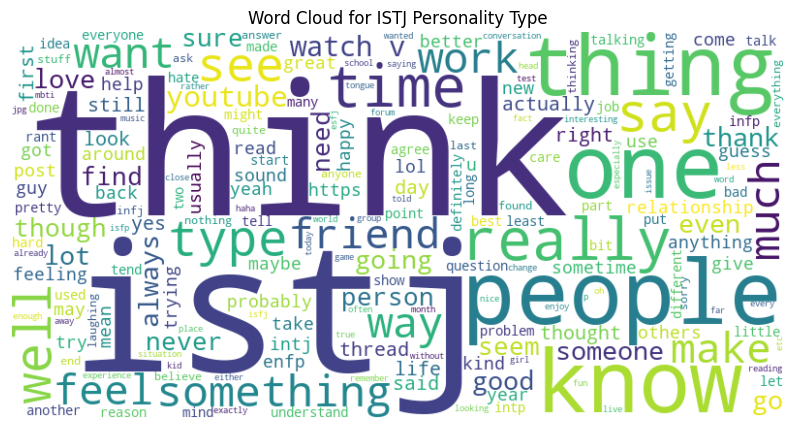

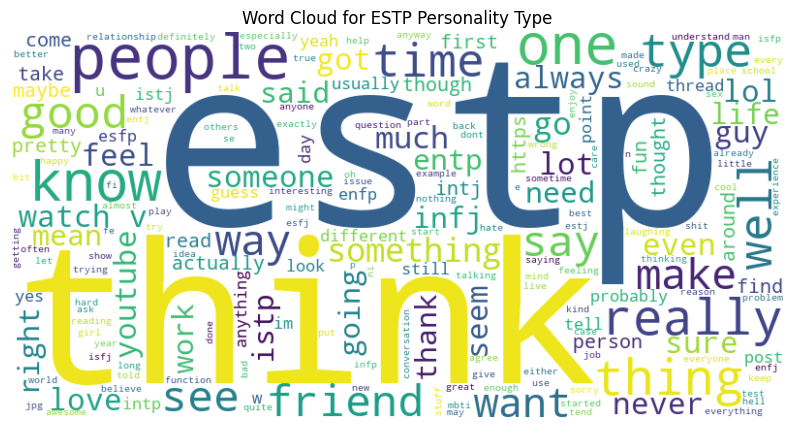

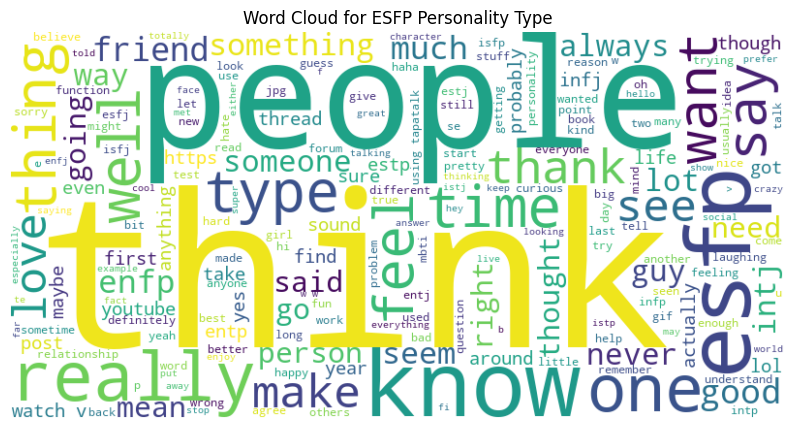

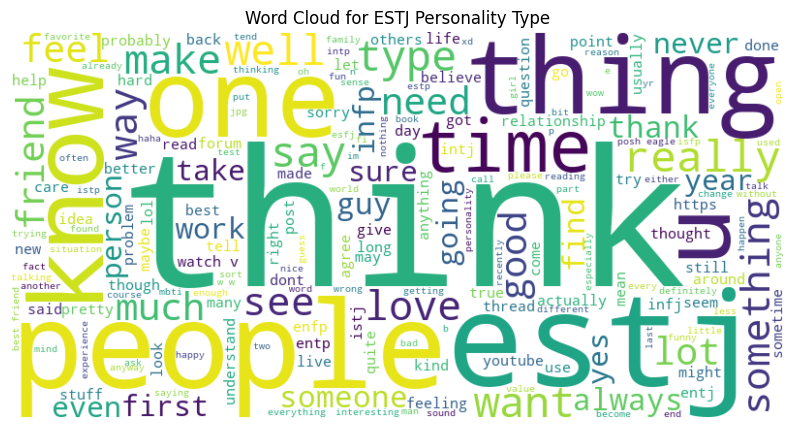

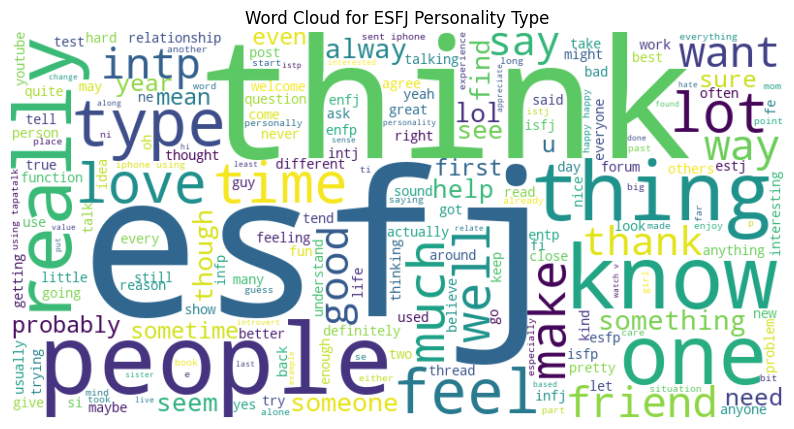

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Word cloud for entire dataset
all_posts = ' '.join(mbti_df["posts"])
generate_word_cloud(all_posts, "Word Cloud for Entire Dataset")

# Word clouds for each MBTI category
categories = mbti_df['type'].unique()
for category in categories:
    category_posts = ' '.join(mbti_df[mbti_df['type'] == category]['posts'])
    generate_word_cloud(category_posts, f"Word Cloud for {category} Personality Type")


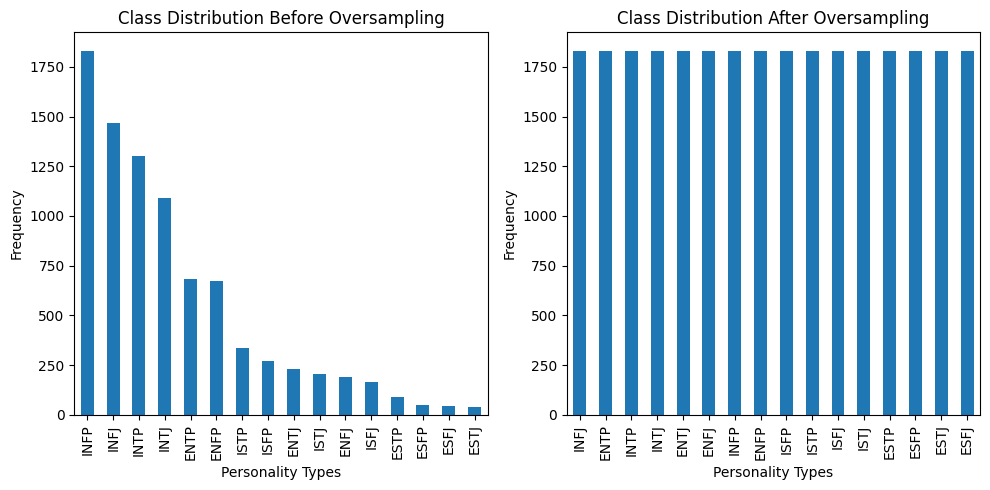

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Apply random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(mbti_df['posts'].values.reshape(-1, 1), mbti_df['type'])

# Convert resampled data back to DataFrame
mbti_resampled_df = pd.DataFrame({'posts': X_resampled.flatten(), 'type': y_resampled})

# Plot class distribution before and after oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Class Distribution Before Oversampling')
mbti_df['type'].value_counts().plot(kind='bar')
plt.xlabel('Personality Types')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.title('Class Distribution After Oversampling')
mbti_resampled_df['type'].value_counts().plot(kind='bar')
plt.xlabel('Personality Types')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
